In [185]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df1 = pd.read_csv('/kaggle/input/pakistansuicideattacks/PakistanSuicideAttacks Ver 11 (30-November-2017).csv', encoding='ISO-8859-1')
df2 = pd.read_csv('/kaggle/input/pakistansuicideattacks/PakistanSuicideAttacks Ver 6 (10-October-2017).csv', encoding='ISO-8859-1')

df = pd.concat([df1, df2])
df.shape


(988, 26)

In [187]:
df.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [188]:
df.columns

Index(['S#', 'Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [189]:
date_parts = df['Date'].str.split('-', expand=True)
date_parts.columns = ['Day', 'Month_Date', 'Year', 'Year1']

# Assign the new columns back to the DataFrame
df = pd.concat([df, date_parts], axis=1)


In [223]:
df['Targeted Sect if any'].replace('None')

None         748
Sunni         76
Shiite        72
Christian     18
shiite        16
Jews           2
Ahmedi         2
Name: Targeted Sect if any, dtype: int64

In [221]:
df['Islamic Date'].fillna('None', inplace=True)
df['Blast Day Type'].fillna('Working Day', inplace=True)
df['Time'].fillna(df['Time'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Latitude'].fillna(df['Latitude'].mode()[0], inplace=True)
df['Longitude'].fillna(df['Latitude'].mode()[0], inplace=True)
df['Province'].fillna(df['Province'].mode()[0], inplace=True)
df['Targeted Sect if any'].fillna(df['Targeted Sect if any'].mode()[0], inplace=True)
df['Injured Max'].fillna(df['Injured Max'].mode()[0], inplace=True)
df['Injured Min'].fillna(df['Injured Min'].mode()[0], inplace=True)
df['Killed Min'].fillna(0, inplace=True)
df['Killed Max'].fillna(1.0, inplace=True)
df['No. of Suicide Blasts'].fillna(df['No. of Suicide Blasts'].mode()[0], inplace=True)
df['Explosive Weight (max)'].fillna(df['Explosive Weight (max)'].mode()[0], inplace=True)
df['Hospital Names'].fillna(df['Hospital Names'].mode()[0], inplace=True)
df['Temperature(C)'].fillna(df['Temperature(C)'].mode()[0], inplace=True)
df['Temperature(F)'].fillna(df['Temperature(F)'].mode()[0], inplace=True)
df['Open/Closed Space'].fillna(df['Open/Closed Space'].mode()[0], inplace=True)
df['Location Sensitivity'].fillna(df['Location Sensitivity'].mode()[0], inplace=True)
df['Location Category'].fillna(df['Location Category'].mode()[0], inplace=True)

In [191]:
df['Targeted Sect if any'].replace(('Shiite', 'Shiite/sunni'),('Shiite', 'Shiite'), inplace=True)

In [192]:
df.drop('S#', axis=1, inplace=True)

In [193]:
index_to_drop = 452
df.drop(index_to_drop, inplace=True)

In [194]:
df.shape

(986, 29)

In [195]:
df['No. of Suicide Blasts'].unique()

array([2., 1., 3., 4.])

In [196]:
df.shape

(986, 29)

In [197]:
index3 = [449]
df.drop(index3, inplace=True)

In [198]:
df['Injured Max'] = df['Injured Max'].replace(r'[^0-9.]', '', regex=True).astype(float)
df['Explosive Weight (max)'] = df['Explosive Weight (max)'].replace(r'[^0-9.]', '', regex=True).astype(float)
df['Year'] = df['Year'].replace(r'[^0-9.]', '', regex=True).astype(float)

In [199]:
df['people killed'] = df['Killed Min'] + df['Killed Max']
df['people killed']

0      29.0
1       3.0
2      28.0
3      12.0
4      91.0
       ... 
487     3.0
488     2.0
489    53.0
490    30.0
491    43.0
Name: people killed, Length: 984, dtype: float64

In [200]:
values_to_delete = [12.0, 15.0, 24.0, 17.0, 22.0, 9.0, 16.0, 13.0, 7.0, 26.0, 29.0, 25.0, 5.0, 23.0, 21.0, 19.0, 16.0, 113.0, 10.0, 20.0]


df = df[~df['Year'].isin(values_to_delete)]


df.reset_index(drop=True, inplace=True)


In [201]:
df['people killed']

0       29.0
1        3.0
2       28.0
3       12.0
4       91.0
       ...  
929      2.0
930    140.0
931     27.0
932      0.0
933     52.0
Name: people killed, Length: 934, dtype: float64

In [202]:
df['Open/Closed Space'].replace(('Open'),('open'), inplace=True, regex=True)


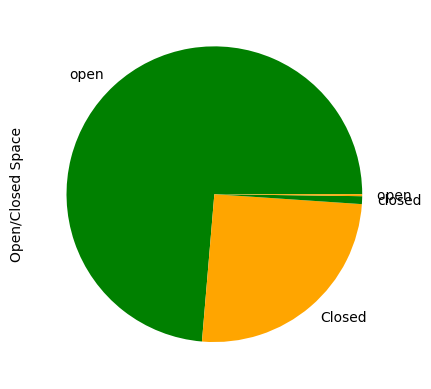

In [203]:
df['Open/Closed Space'].value_counts().plot.pie(colors=['green', 'orange'])
plt.show();

In [204]:
df['Location Sensitivity'].replace(('Low'),('low'), inplace=True)

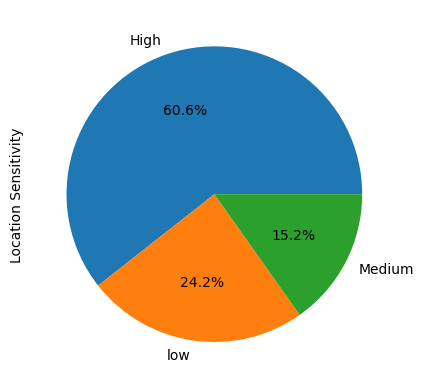

In [227]:
df['Location Sensitivity'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show();

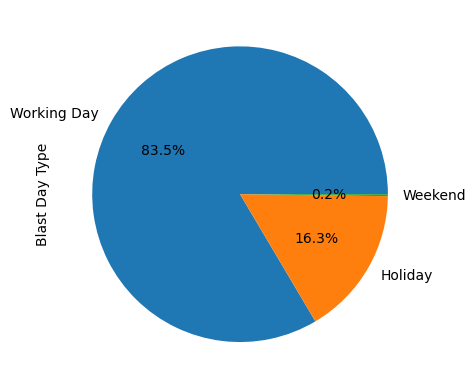

In [228]:
df['Blast Day Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show();

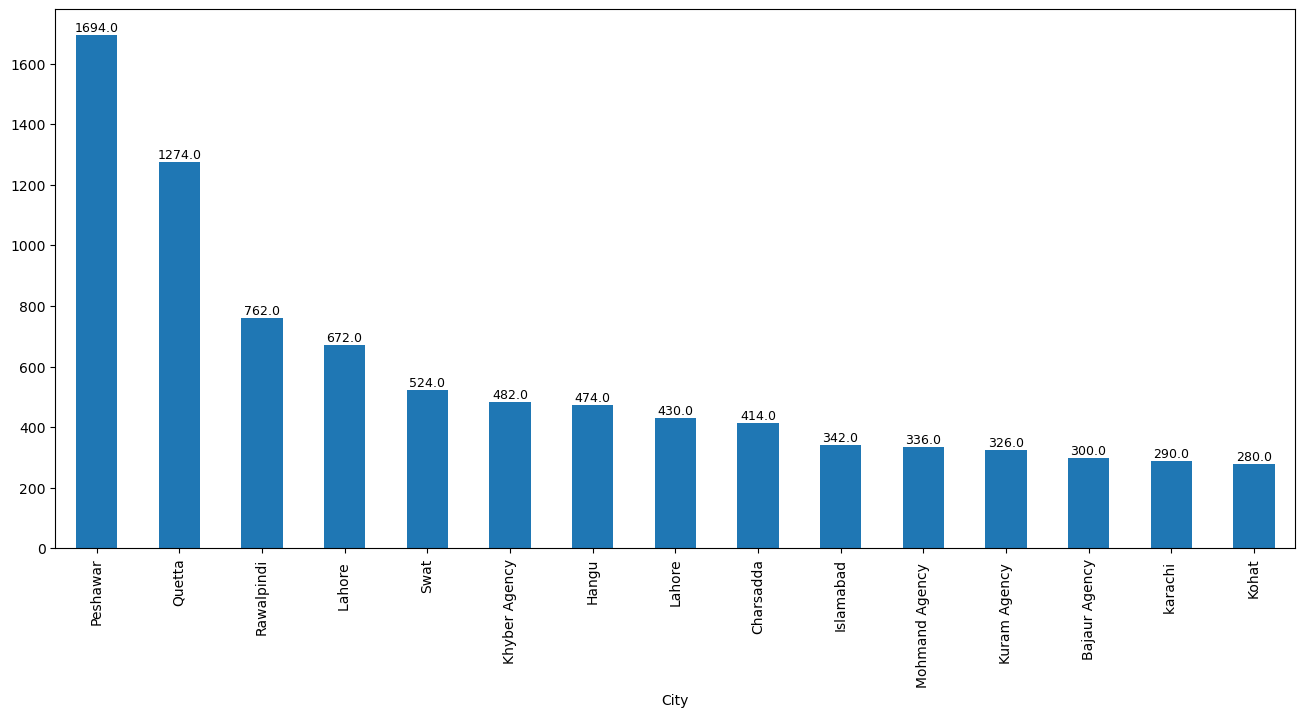

In [231]:
city_deaths = df.groupby('City')['Killed Max'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize = (16, 7))

ax = city_deaths.plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

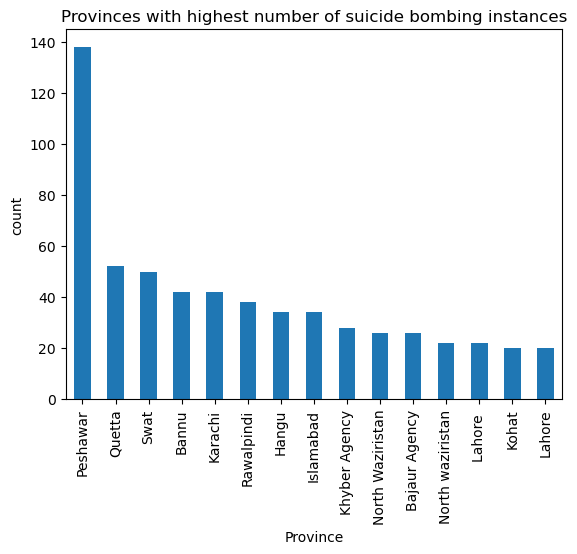

In [226]:
df['City'].value_counts().head(15).plot.bar()
plt.title('Provinces with highest number of suicide bombing instances')
plt.xlabel('Province')
plt.ylabel('count')
plt.show();

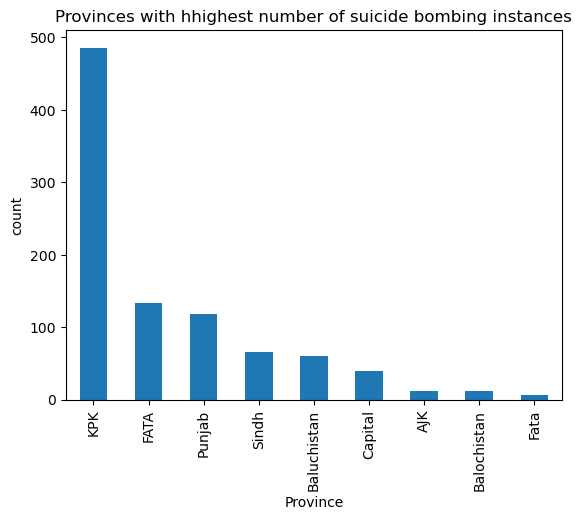

In [220]:
df['Province'].value_counts().plot.bar()
plt.title('Provinces with hhighest number of suicide bombing instances')
plt.xlabel('Province')
plt.ylabel('count')
plt.show();

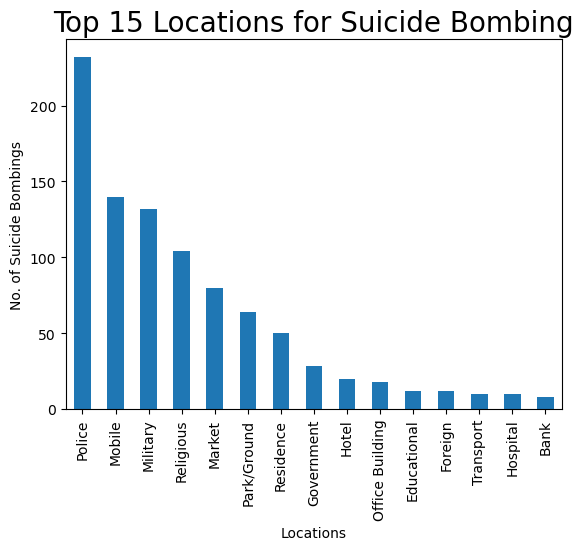

In [206]:
df['Location Category'].value_counts().head(15).plot.bar()
plt.title('Top 15 Locations for Suicide Bombing', fontsize = 20)
plt.xlabel('Locations')
plt.ylabel('No. of Suicide Bombings')
plt.show();

<Axes: >

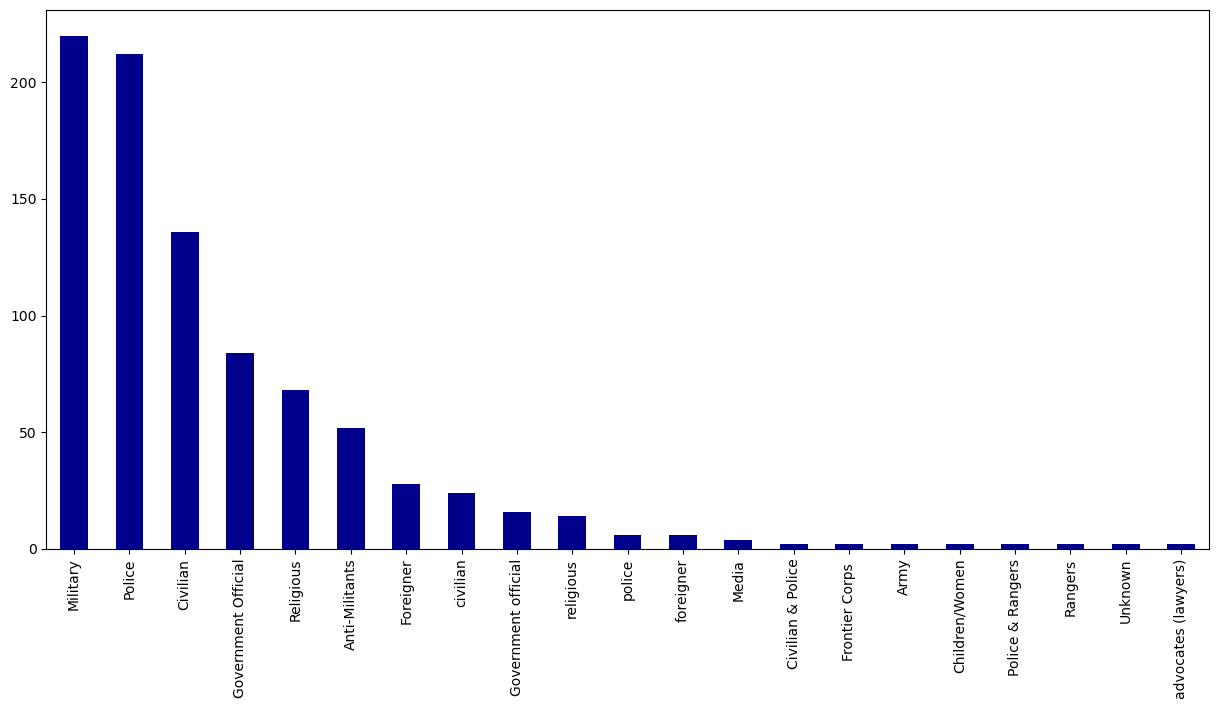

In [207]:
df['Target Type'].value_counts().plot.bar(figsize = (15, 7), color = 'darkblue')

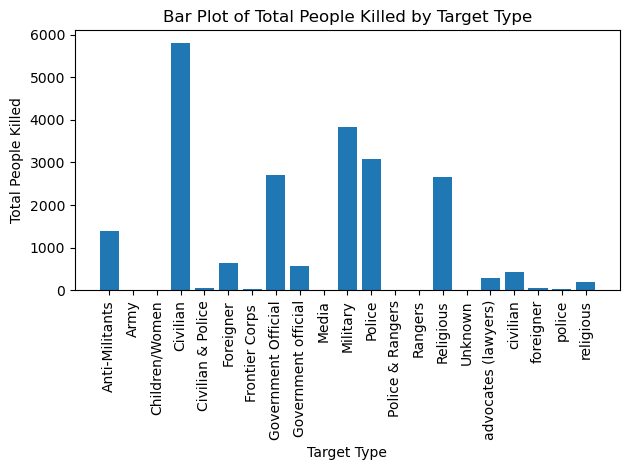

In [208]:
grouped = df.groupby('Target Type')['people killed'].sum()
plt.bar(grouped.index, grouped.values)
plt.xlabel('Target Type')
plt.ylabel('Total People Killed')
plt.title('Bar Plot of Total People Killed by Target Type')

# Rotate x labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

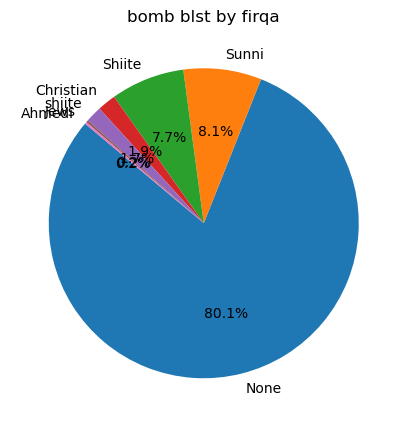

In [222]:
cols = df['Targeted Sect if any'].value_counts()

plt.figure(figsize = (5, 8))
plt.pie(cols, labels=cols.index, autopct='%1.1f%%', startangle=140)
plt.title('bomb blst by firqa')
plt.show()

In [210]:
df.sort_values('Year', inplace = True)

<Axes: xlabel='Year', ylabel='Killed Max'>

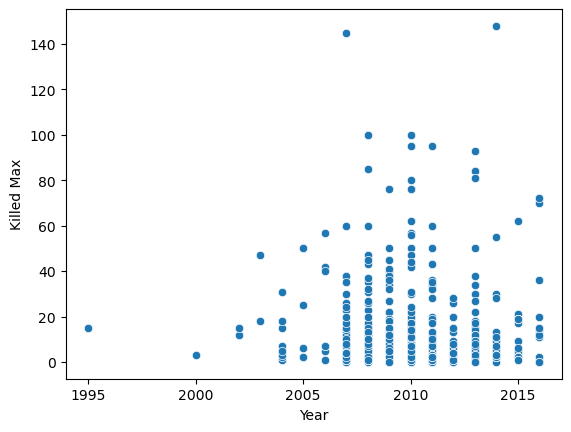

In [211]:
sns.scatterplot(x=df['Year'], y=df['Killed Max'])

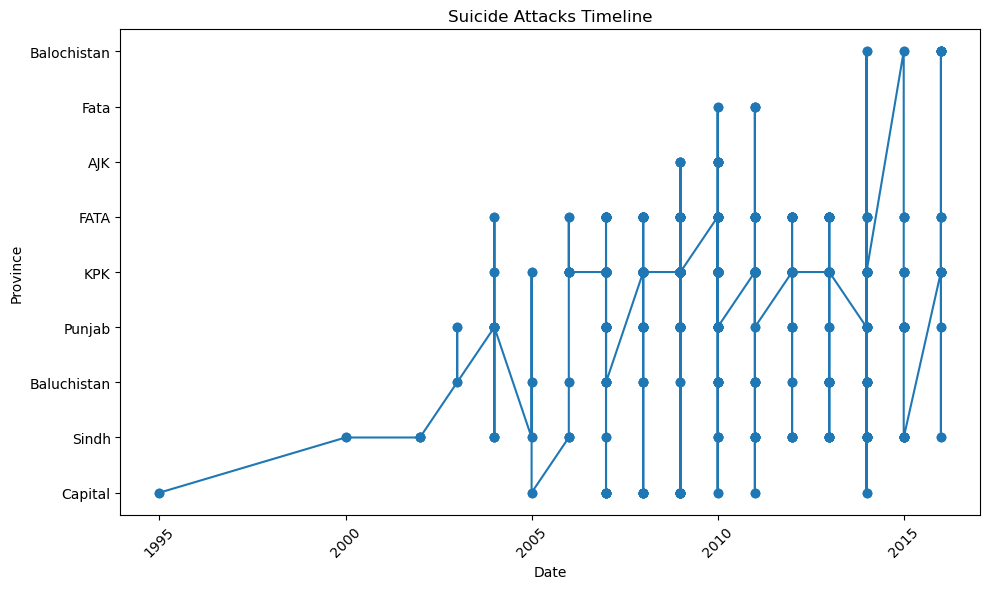

In [212]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Province'], marker='o')
plt.title('Suicide Attacks Timeline')
plt.xlabel('Date')
plt.ylabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [213]:
df.isnull().sum()

Date                         0
Islamic Date                 0
Blast Day Type               0
Holiday Type               794
Time                         0
City                         0
Latitude                     0
Longitude                    0
Province                     0
Location                     6
Location Category            0
Location Sensitivity         0
Open/Closed Space            0
Influencing Event/Event    600
Target Type                 48
Targeted Sect if any         0
Killed Min                   0
Killed Max                   0
Injured Min                  0
Injured Max                  0
No. of Suicide Blasts        0
Explosive Weight (max)       0
Hospital Names               0
Temperature(C)               0
Temperature(F)               0
Day                          0
Month_Date                   0
Year                         0
Year1                      934
people killed                0
dtype: int64

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     934 non-null    object 
 1   Islamic Date             934 non-null    object 
 2   Blast Day Type           934 non-null    object 
 3   Holiday Type             140 non-null    object 
 4   Time                     934 non-null    object 
 5   City                     934 non-null    object 
 6   Latitude                 934 non-null    float64
 7   Longitude                934 non-null    object 
 8   Province                 934 non-null    object 
 9   Location                 928 non-null    object 
 10  Location Category        934 non-null    object 
 11  Location Sensitivity     934 non-null    object 
 12  Open/Closed Space        934 non-null    object 
 13  Influencing Event/Event  334 non-null    object 
 14  Target Type              8

In [215]:
df.describe()

,Latitude,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Temperature(C),Temperature(F),Year,people killed
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,32.675826,10.177730,14.593148,23.164882,37.117773,1.087794,1793.622056,20.826756,69.488161,2009.925054,24.770878
std,2.458781,16.109769,19.933259,35.270211,53.591014,0.331938,28524.427961,8.225801,14.806441,2.860972,35.071401
min,24.879503,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-2.370000,27.734000,1995.000000,0.000000
25%,32.226000,0.000000,2.000000,2.000000,6.000000,1.000000,6.000000,14.498750,58.097750,2008.000000,3.000000
50%,33.583300,4.000000,7.000000,10.000000,20.000000,1.000000,6.000000,21.100000,69.980000,2009.000000,11.000000
75%,34.004300,13.000000,17.750000,29.000000,47.000000,1.000000,10.000000,27.695000,81.851000,2012.000000,30.000000
max,35.383300,125.000000,148.000000,320.000000,550.000000,4.000000,600800.000000,36.345000,97.421000,2016.000000,270.000000


In [216]:
Done: How many people got killed and injured per year?
Visualize suicide attacks on timeline
Find out any correlation with number of suicide bombing attacks with drone attacks
Find out any correlation with suicide bombing attacks with influencing events given in the dataset
Can we predict the next suicide bombing attack?
Find the correlation between blast/explosive weight and number of people killed and injured
Find the impact of holiday type on number of blast victims
Find the correlation between Islamic date and blast day/time/size/number of victims
Find the Top 10 locations of blasts
Find the names of hospitals sorted by number of victims


SyntaxError: invalid syntax (1652314667.py, line 2)